In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [24]:
data = pd.read_csv("BTC-USD_SIGNALS.csv")
data

,Date,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,Confirmation Time,Transactions,Miners Revenue
0,2014-09-19,424.102997,427.834991,384.532013,394.795990,-0.792147,-1.859900,-2.943160,-0.057629,-0.015462,-0.917832,-2.189543,-0.817910
1,2014-09-20,394.673004,423.295990,389.882996,408.903992,-0.792200,0.871823,-2.943160,-0.059905,-0.018242,-0.997173,-2.189543,-0.817910
2,2014-09-21,408.084991,412.425995,393.181000,398.821014,-0.792718,-0.690803,-1.856302,-0.062400,-0.021104,-0.997173,-2.417949,-0.847329
3,2014-09-22,399.100006,406.915985,397.130005,402.152008,-0.792842,0.163318,-1.988871,-0.063948,-0.020636,-0.997173,-2.417949,-0.847329
4,2014-09-23,402.092010,441.557007,396.196991,435.790985,-0.791785,2.111516,-1.812541,-0.062275,-0.010871,-1.072907,-2.417949,-0.847329
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2022-09-04,19832.470703,19999.689453,19636.816406,19986.712891,0.478227,0.148948,-1.113287,-0.844382,-0.254845,-1.202511,-0.040819,0.203364
2924,2022-09-05,19988.789063,20031.160156,19673.046875,19812.371094,0.658018,-0.278482,-1.133325,-0.831832,-0.166540,-0.875457,-0.040819,0.203364
2925,2022-09-06,19817.724609,20155.269531,18800.171875,18837.667969,1.393318,-1.325705,-1.548973,-0.892284,-0.308652,-0.875457,0.291152,0.153032
2926,2022-09-07,18837.683594,19427.171875,18644.466797,19290.324219,0.981876,0.568952,-1.180050,-0.893278,-0.249058,-0.875457,0.291152,0.153032


# Correlations

In [25]:
corr = data.corr("spearman")
corr

,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,Confirmation Time,Transactions,Miners Revenue
Open,1.000000,0.999622,0.999508,0.999229,0.921444,-0.032619,-0.024406,0.096847,0.025610,-0.028939,0.515056,0.959119
High,0.999622,1.000000,0.999313,0.999593,0.922885,-0.016299,-0.019742,0.098278,0.027942,-0.026575,0.515140,0.959876
Low,0.999508,0.999313,1.000000,0.999634,0.920428,-0.015343,-0.018731,0.098639,0.030789,-0.031401,0.517082,0.957739
Close,0.999229,0.999593,0.999634,1.000000,0.921667,-0.001336,-0.015530,0.099661,0.031695,-0.028235,0.516498,0.958809
Volume,0.921444,0.922885,0.920428,0.921667,1.000000,-0.002845,0.003052,0.119761,0.036956,0.021483,0.610071,0.873577
Variation,-0.032619,-0.016299,-0.015343,-0.001336,-0.002845,1.000000,0.255476,0.093067,0.135548,0.076817,0.050597,-0.025261
RSI,-0.024406,-0.019742,-0.018731,-0.015530,0.003052,0.255476,1.000000,0.631357,0.622309,0.258611,0.224005,-0.034158
MACD,0.096847,0.098278,0.098639,0.099661,0.119761,0.093067,0.631357,1.000000,0.206761,0.308711,0.331442,0.098713
MACD_H,0.025610,0.027942,0.030789,0.031695,0.036956,0.135548,0.622309,0.206761,1.000000,0.046404,0.072471,0.025646
Confirmation Time,-0.028939,-0.026575,-0.031401,-0.028235,0.021483,0.076817,0.258611,0.308711,0.046404,1.000000,0.239417,-0.081033


In [26]:
corr[["Variation"]].sort_values(by="Variation")

,Variation
Open,-0.032619
Miners Revenue,-0.025261
High,-0.016299
Low,-0.015343
Volume,-0.002845
Close,-0.001336
Transactions,0.050597
Confirmation Time,0.076817
MACD,0.093067
MACD_H,0.135548


array([[<AxesSubplot:xlabel='Open', ylabel='Open'>,
        <AxesSubplot:xlabel='High', ylabel='Open'>,
        <AxesSubplot:xlabel='Low', ylabel='Open'>,
        <AxesSubplot:xlabel='Close', ylabel='Open'>,
        <AxesSubplot:xlabel='Volume', ylabel='Open'>,
        <AxesSubplot:xlabel='Variation', ylabel='Open'>,
        <AxesSubplot:xlabel='RSI', ylabel='Open'>,
        <AxesSubplot:xlabel='MACD', ylabel='Open'>,
        <AxesSubplot:xlabel='MACD_H', ylabel='Open'>,
        <AxesSubplot:xlabel='Confirmation Time', ylabel='Open'>,
        <AxesSubplot:xlabel='Transactions', ylabel='Open'>,
        <AxesSubplot:xlabel='Miners Revenue', ylabel='Open'>],
       [<AxesSubplot:xlabel='Open', ylabel='High'>,
        <AxesSubplot:xlabel='High', ylabel='High'>,
        <AxesSubplot:xlabel='Low', ylabel='High'>,
        <AxesSubplot:xlabel='Close', ylabel='High'>,
        <AxesSubplot:xlabel='Volume', ylabel='High'>,
        <AxesSubplot:xlabel='Variation', ylabel='High'>,
        <AxesSubp

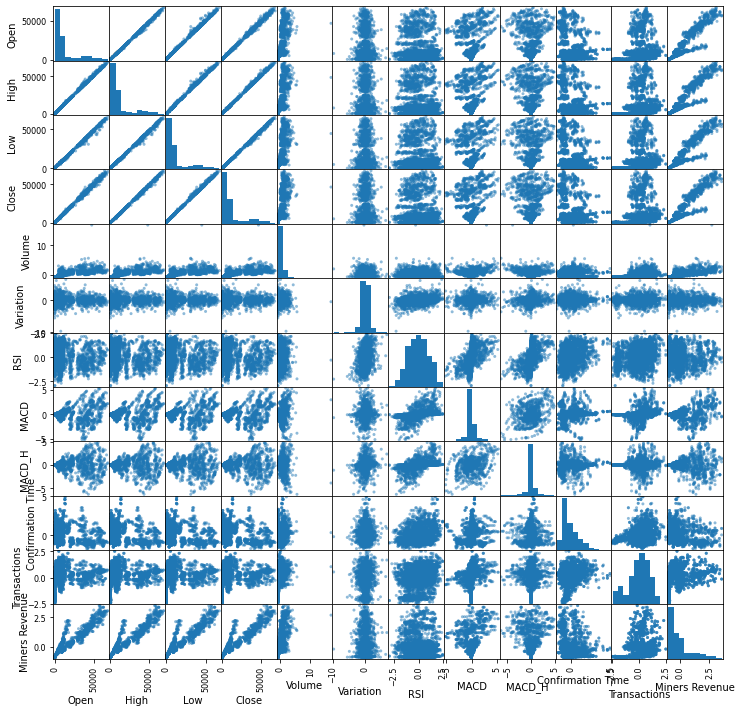

In [35]:
pd.plotting.scatter_matrix(data,figsize=[12,12])

## Adding Variation+1

In [36]:
newdata = data.copy()
newdata["Variation+1"] = data["Variation"].shift(-1)
newdata

,Date,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,Confirmation Time,Transactions,Miners Revenue,Variation+1
0,2014-09-19,424.102997,427.834991,384.532013,394.795990,-0.792147,-1.859900,-2.943160,-0.057629,-0.015462,-0.917832,-2.189543,-0.817910,0.871823
1,2014-09-20,394.673004,423.295990,389.882996,408.903992,-0.792200,0.871823,-2.943160,-0.059905,-0.018242,-0.997173,-2.189543,-0.817910,-0.690803
2,2014-09-21,408.084991,412.425995,393.181000,398.821014,-0.792718,-0.690803,-1.856302,-0.062400,-0.021104,-0.997173,-2.417949,-0.847329,0.163318
3,2014-09-22,399.100006,406.915985,397.130005,402.152008,-0.792842,0.163318,-1.988871,-0.063948,-0.020636,-0.997173,-2.417949,-0.847329,2.111516
4,2014-09-23,402.092010,441.557007,396.196991,435.790985,-0.791785,2.111516,-1.812541,-0.062275,-0.010871,-1.072907,-2.417949,-0.847329,-0.800050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,2022-09-04,19832.470703,19999.689453,19636.816406,19986.712891,0.478227,0.148948,-1.113287,-0.844382,-0.254845,-1.202511,-0.040819,0.203364,-0.278482
2924,2022-09-05,19988.789063,20031.160156,19673.046875,19812.371094,0.658018,-0.278482,-1.133325,-0.831832,-0.166540,-0.875457,-0.040819,0.203364,-1.325705
2925,2022-09-06,19817.724609,20155.269531,18800.171875,18837.667969,1.393318,-1.325705,-1.548973,-0.892284,-0.308652,-0.875457,0.291152,0.153032,0.568952
2926,2022-09-07,18837.683594,19427.171875,18644.466797,19290.324219,0.981876,0.568952,-1.180050,-0.893278,-0.249058,-0.875457,0.291152,0.153032,0.000209


In [37]:
corr = newdata.corr("spearman")
corr

,Open,High,Low,Close,Volume,Variation,RSI,MACD,MACD_H,Confirmation Time,Transactions,Miners Revenue,Variation+1
Open,1.000000,0.999622,0.999508,0.999229,0.921444,-0.032619,-0.024406,0.096847,0.025610,-0.028939,0.515056,0.959119,-0.031362
High,0.999622,1.000000,0.999313,0.999593,0.922885,-0.016299,-0.019742,0.098278,0.027942,-0.026575,0.515140,0.959876,-0.031711
Low,0.999508,0.999313,1.000000,0.999634,0.920428,-0.015343,-0.018731,0.098639,0.030789,-0.031401,0.517082,0.957739,-0.032785
Close,0.999229,0.999593,0.999634,1.000000,0.921667,-0.001336,-0.015530,0.099661,0.031695,-0.028235,0.516498,0.958809,-0.033041
Volume,0.921444,0.922885,0.920428,0.921667,1.000000,-0.002845,0.003052,0.119761,0.036956,0.021483,0.610071,0.873577,-0.013947
Variation,-0.032619,-0.016299,-0.015343,-0.001336,-0.002845,1.000000,0.255476,0.093067,0.135548,0.076817,0.050597,-0.025261,-0.012590
RSI,-0.024406,-0.019742,-0.018731,-0.015530,0.003052,0.255476,1.000000,0.631357,0.622309,0.258611,0.224005,-0.034158,0.055037
MACD,0.096847,0.098278,0.098639,0.099661,0.119761,0.093067,0.631357,1.000000,0.206761,0.308711,0.331442,0.098713,0.053748
MACD_H,0.025610,0.027942,0.030789,0.031695,0.036956,0.135548,0.622309,0.206761,1.000000,0.046404,0.072471,0.025646,0.019899
Confirmation Time,-0.028939,-0.026575,-0.031401,-0.028235,0.021483,0.076817,0.258611,0.308711,0.046404,1.000000,0.239417,-0.081033,0.079724


In [38]:
corr[["Variation+1"]].sort_values(by="Variation+1")

,Variation+1
Close,-0.033041
Low,-0.032785
High,-0.031711
Miners Revenue,-0.031635
Open,-0.031362
Volume,-0.013947
Variation,-0.012590
MACD_H,0.019899
Transactions,0.048441
MACD,0.053748


In [39]:
#plt.show()

## Variation with respect to other variables

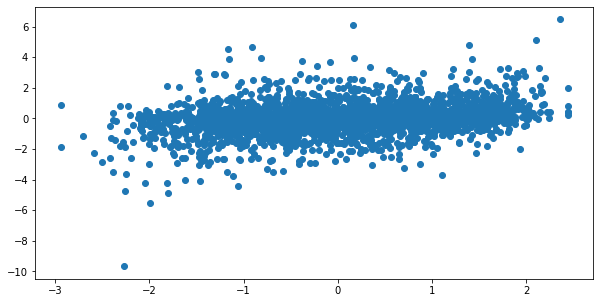

In [40]:
plt.figure(figsize=[10,5])
plt.scatter(data["RSI"],data["Variation"])

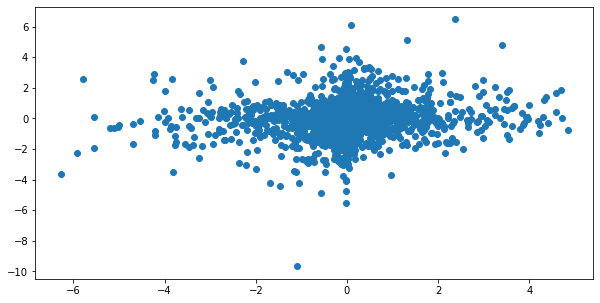

In [41]:
plt.figure(figsize=[10,5])
plt.scatter(data["MACD_H"],data["Variation"])

No handles with labels found to put in legend.


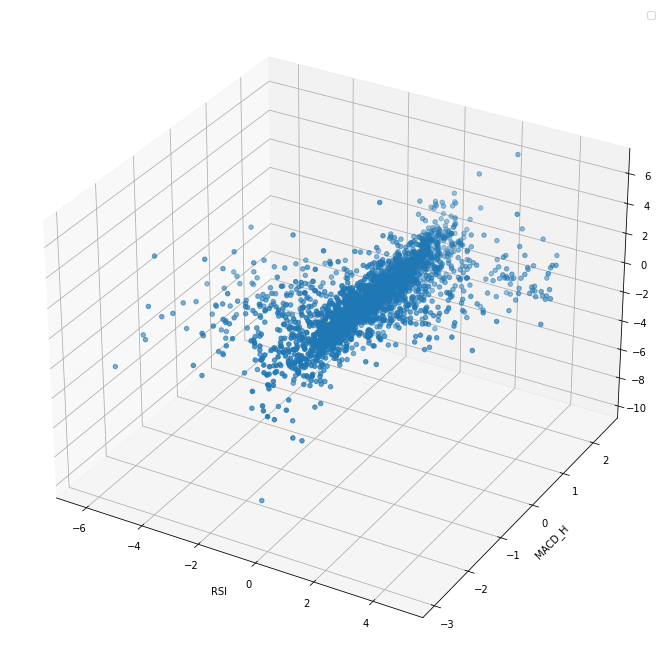

In [42]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(list(data["MACD_H"]),list(data["RSI"]),list(data["Variation"]))
plt.xlabel(xlabel="RSI")
plt.ylabel(ylabel="MACD_H")
plt.legend()
plt.show()